In [2]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

df = pd.read_csv('apache.csv', index_col=0, skiprows=0)

Automatically created module for IPython interactive environment


In [3]:
vect = TfidfVectorizer()
X = vect.fit_transform(df['summary'].values.astype('U')) 
yr = df['priority'].values.astype('U')

In [4]:
yr

array([u'Major', u'Critical', u'Trivial', u'Major', u'Major', u'Minor',
       u'Minor', u'Major', u'Major', u'Blocker', u'Major', u'Trivial',
       u'Minor', u'Major', u'Major', u'Major', u'Major', u'Major',
       u'Minor', u'Major', u'Major', u'Minor', u'Major', u'Major',
       u'Critical', u'Trivial', u'Major', u'Trivial', u'Minor',
       u'Critical', u'Major', u'Major', u'Critical', u'Major', u'Trivial',
       u'Blocker', u'Major', u'Major', u'Major', u'Major', u'Major',
       u'Major', u'Major', u'Major', u'Major', u'Blocker', u'Major',
       u'Major', u'Major', u'Major', u'Major', u'Major', u'Major',
       u'Major', u'Major', u'Blocker', u'Blocker', u'Critical',
       u'Critical', u'Major', u'Minor', u'Minor', u'Major', u'Major',
       u'Major', u'Major', u'Major', u'Major', u'Minor', u'Minor',
       u'Major', u'Major', u'Critical', u'Major', u'Major', u'Major',
       u'Blocker', u'Major', u'Minor', u'Minor', u'Critical', u'Major',
       u'Major', u'Major', u'Major',

In [7]:
y = label_binarize(yr, classes=["Trivial", "Minor", "Major", "Critical", "Blocker"])

In [8]:
y

array([[0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0],
       ..., 
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0]])

In [9]:
n_classes = y.shape[1]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,
                                                    random_state=0)

In [12]:
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)


In [13]:
fpr = dict()
tpr = dict()
roc_auc = dict()

print y_score[:5]
print y_test[:5]

[[-0.93196739 -0.80715245  0.50125682 -1.29484155 -0.99501707]
 [-0.87894812 -0.43441491 -0.47923741 -0.99039809 -0.91234347]
 [-0.99036149 -0.9504866   0.65740958 -1.02848806 -1.02269287]
 [-0.01679977 -1.33629284 -0.07283344 -1.12611969 -1.01454608]
 [-0.92068115 -0.57191493  0.1793204  -1.15011535 -1.11635405]]
[[0 0 1 0 0]
 [0 0 1 0 0]
 [0 0 1 0 0]
 [1 0 0 0 0]
 [0 1 0 0 0]]


In [14]:
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

In [15]:
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

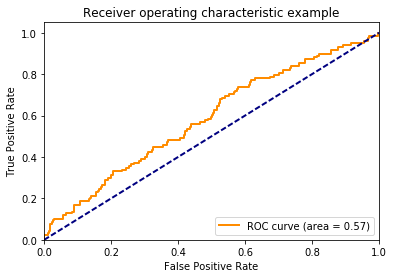

In [18]:
plt.figure()
lw = 2
plt.plot(fpr[1], tpr[1], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

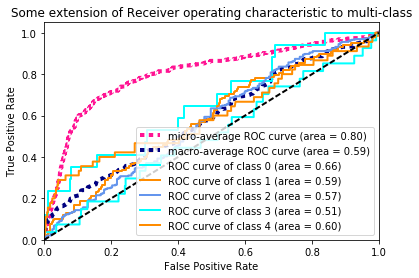

In [19]:
# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()